In [20]:
import numpy as np
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
import matplotlib.pylab as plt
import pickle
import random

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [16]:
#Move all benign files to one folder
from pathlib import Path
import shutil

benign= glob.glob("C:\\Users\\feagm\Desktop\\ENEL_645\\Project\\archive\\benign\\*\\*\\*\\*.png")
trg_path = "C:\\Users\\feagm\Desktop\\ENEL_645\\Project\\archive\\benign"

print(benign)
print(trg_path)

for file in benign:
    shutil.move(file, trg_path)

[]
C:\Users\feagm\Desktop\ENEL_645\Project\archive\benign


In [17]:
#Move all malignant files to one folder
malignant= glob.glob("C:\\Users\\feagm\Desktop\\ENEL_645\\Project\\archive\\malignant\\*\\*\\*\\*.png")
trg_path = "C:\\Users\\feagm\Desktop\\ENEL_645\\Project\\archive\\malignant"

print(malignant)
print(trg_path)

for file in malignant:
    shutil.move(file, trg_path)

['C:\\Users\\feagm\\Desktop\\ENEL_645\\Project\\archive\\malignant\\ductal_carcinoma\\SOB_M_DC_14-10926\\100X\\SOB_M_DC-14-10926-100-001.png', 'C:\\Users\\feagm\\Desktop\\ENEL_645\\Project\\archive\\malignant\\ductal_carcinoma\\SOB_M_DC_14-10926\\100X\\SOB_M_DC-14-10926-100-002.png', 'C:\\Users\\feagm\\Desktop\\ENEL_645\\Project\\archive\\malignant\\ductal_carcinoma\\SOB_M_DC_14-10926\\100X\\SOB_M_DC-14-10926-100-003.png', 'C:\\Users\\feagm\\Desktop\\ENEL_645\\Project\\archive\\malignant\\ductal_carcinoma\\SOB_M_DC_14-10926\\100X\\SOB_M_DC-14-10926-100-004.png', 'C:\\Users\\feagm\\Desktop\\ENEL_645\\Project\\archive\\malignant\\ductal_carcinoma\\SOB_M_DC_14-10926\\100X\\SOB_M_DC-14-10926-100-005.png', 'C:\\Users\\feagm\\Desktop\\ENEL_645\\Project\\archive\\malignant\\ductal_carcinoma\\SOB_M_DC_14-10926\\100X\\SOB_M_DC-14-10926-100-006.png', 'C:\\Users\\feagm\\Desktop\\ENEL_645\\Project\\archive\\malignant\\ductal_carcinoma\\SOB_M_DC_14-10926\\100X\\SOB_M_DC-14-10926-100-007.png', 'C:\\

In [19]:
#Separating into Train and Test Sets
benign_images = glob.glob("C:\\Users\\feagm\Desktop\\ENEL_645\\Project\\archive\\benign\\*.png")
malignant_images = glob.glob("C:\\Users\\feagm\Desktop\\ENEL_645\\Project\\archive\\malignant\\*.png")

#Shuffling list of images
random.Random(154).shuffle(benign_images)
random.Random(154).shuffle(malignant_images)

benig_len1 = int(0.70*len(benign_images));
benig_len2 = len(benign_images) - benig_len1
print(benig_len1)
print(benig_len2)

malignant_len1 = int(0.70*len(malignant_images));
malignant_len2 = len(malignant_images) - malignant_len1

print(malignant_len1)
print(malignant_len2)

#Splitting 
benign_train_images = benign_images[:benig_len1]
benign_test_images = benign_images[benig_len1:]

malignant_train_images = malignant_images[:malignant_len1]
malignant_test_images = malignant_images[malignant_len1:]

print(len(benign_train_images))
print(len(benign_test_images))

print(len(malignant_train_images))
print(len(malignant_test_images))


1736
744
3800
1629
1736
744
3800
1629


In [21]:
#Moving bening Images to Train and test folders
trg_path_test = "C:\\Users\\feagm\Desktop\ENEL_645\\Project\\archive\\test\\benign"
trg_path_train = "C:\\Users\\feagm\Desktop\ENEL_645\\Project\\archive\\train\\benign"

for file in benign_test_images:
    shutil.move(file, trg_path_test)

for file in benign_train_images:
    shutil.move(file, trg_path_train)

In [22]:
#Moving malignant Images to Train and test folders
trg_path_test = "C:\\Users\\feagm\Desktop\ENEL_645\\Project\\archive\\test\\malignant"
trg_path_train = "C:\\Users\\feagm\Desktop\ENEL_645\\Project\\archive\\train\\malignant"

for file in malignant_test_images:
    shutil.move(file, trg_path_test)

for file in malignant_train_images:
    shutil.move(file, trg_path_train)

In [23]:
images_train_val = glob.glob("C:\\Users\\feagm\Desktop\ENEL_645\\Project\\archive\\train\\*\\*.png")
images_test = glob.glob("C:\\Users\\feagm\Desktop\ENEL_645\\Project\\archive\\test\\*\\*.png")

print(len(images_train_val))
print(len(images_test))





5536
2373


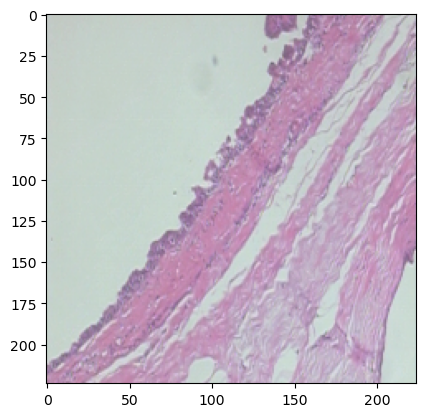

In [16]:
train_batch = train_ds.take(1)
for images, labels in train_batch:
        plt.imshow(images[0].numpy().astype("uint8"))

USE CELLS BELLOW after dataset is prepared with test and train folders

In [21]:
IMAGE_SIZE = (224, 340)
CROP_SIZE = (224, 224)
BATCH_SIZE = 32

AUTOTUNE = tf.data.AUTOTUNE

# Felipe
#image_train_val = "C:\\Users\\feagm\Desktop\\ENEL_645\\Project\\archive\\"
#image_test = "C:\\Users\\feagm\Desktop\\ENEL_645\\Project\\archive\\test"

# Alex
#image_train_val = "D:\\BreakHis_Dataset\\BreaKHis_v1\\histology_slides\\breast\\all_model_data\\train"
#image_test = "D:\\BreakHis_Dataset\\BreaKHis_v1\\histology_slides\\breast\\all_model_data\\test"


def data_prep_train_val(path,
                        image_size,
                        crop_size,
                        batch_size):
    """ 
    This function will take parameters for the datas file path along with the image, crop, and batch size. It will then perform the training
    set's cropping and data augmentation and return the dataset once it is transformed.
    """

    crop_layer = tf.keras.layers.CenterCrop(*crop_size)
    augmentation_layer = tf.keras.Sequential([tf.keras.layers.RandomFlip(), tf.keras.layers.RandomRotation((-0.2, 0.2),seed=34), 
                                              tf.keras.layers.RandomContrast(0.1, seed=34),
                                              tf.keras.layers.RandomHeight(0.2, seed=34),tf.keras.layers.RandomWidth(0.2, seed=34),
                                              tf.keras.layers.Resizing(224,340,crop_to_aspect_ratio=True)])

    train_ds, validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
        path, shuffle=True, label_mode='categorical', validation_split=0.10 / 0.70, subset="both", seed=154,
        batch_size=BATCH_SIZE, image_size=IMAGE_SIZE)

    train_ds = train_ds.map(lambda image, label: (crop_layer(
        image, training=True), label), num_parallel_calls=AUTOTUNE)
    train_ds = train_ds.map(lambda image, label: (augmentation_layer(
        image, training=True), label), num_parallel_calls=AUTOTUNE)

    validation_ds = validation_ds.map(lambda image, label: (
        crop_layer(image, training=True), label), num_parallel_calls=AUTOTUNE)

    return train_ds.prefetch(buffer_size=AUTOTUNE), validation_ds.prefetch(buffer_size=AUTOTUNE)


def data_prep_test(path,
                   image_size,
                   crop_size,
                   batch_size
                   ):

    crop_layer = tf.keras.layers.CenterCrop(*crop_size)
    test_ds = tf.keras.preprocessing.image_dataset_from_directory(
        path, label_mode='categorical', seed=154,
        batch_size=BATCH_SIZE, image_size=IMAGE_SIZE)

    test_ds = test_ds.map(lambda image, label: (crop_layer(
        image, training=True), label), num_parallel_calls=AUTOTUNE)
    return test_ds.prefetch(buffer_size=AUTOTUNE)


In [22]:
train, val= data_prep_train_val("D:\\BreakHis_Dataset\\BreaKHis_v1\\histology_slides\\breast\\all_model_data\\train",IMAGE_SIZE, CROP_SIZE, BATCH_SIZE)

Found 5536 files belonging to 2 classes.
Using 4746 files for training.
Using 790 files for validation.


In [23]:
test_ds = data_prep_test("D:\\BreakHis_Dataset\\BreaKHis_v1\\histology_slides\\breast\\all_model_data\\test",IMAGE_SIZE, CROP_SIZE, BATCH_SIZE)

Found 2373 files belonging to 2 classes.


Basic resnet50 model - Pretrained Imagenet

In [24]:
def resnet50_builder():# Defining the model
    base_model = tf.keras.applications.resnet50.ResNet50(
        weights='imagenet',  
        input_shape=(224,224,3),
        include_top=False) 
    base_model.trainable = False

    x1 = base_model(base_model.input, training = False)
    x2 = tf.keras.layers.Flatten()(x1)


    out = tf.keras.layers.Dense(2, activation = 'softmax')(x2)
    model = tf.keras.Model(inputs = base_model.input, outputs =out)

    return model

Initial Training Model
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________
None


VGGINNET Model

In [6]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Lambda, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Concatenate, BatchNormalization
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D, Dense, Flatten, Activation


def vgginnet_builder():
    base_model = VGG16(include_top=False, input_shape=(224, 224, 3))

    layer_name = 'block4_pool'
    feature_ex_model = Model(inputs=base_model.input, 
                             outputs=base_model.get_layer(layer_name).output, 
                             name='vgg16_features')
    feature_ex_model.trainable = False

    p1_layer = Lambda(vgg_preprocess, name='VGG_Preprocess')
    image_input = Input((224, 224, 3), name='Image_Input')
    p1_tensor = p1_layer(image_input)

    out =feature_ex_model(p1_tensor)
    feature_ex_model = Model(inputs=image_input, outputs=out)

    def naive_inception_module(layer_in, f1, f2, f3):
        # 1x1 conv
        conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
        # 3x3 conv
        conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
        # 5x5 conv
        conv5 = Conv2D(f3, (5,5), padding='same', activation='relu')(layer_in)
        # 3x3 max pooling
        pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
        # concatenate filters, assumes filters/channels last
        layer_out = Concatenate()([conv1, conv3, conv5, pool])
        return layer_out

    out = naive_inception_module(feature_ex_model.output, 64, 128, 32)
    num_classes = 2

    bn1 = BatchNormalization(name='BN')(out)
    f = Flatten()(bn1)
    dropout = Dropout(0.4, name='Dropout')(f)
    desne = Dense(num_classes, activation='softmax', name='Predictions')(dropout)

    model = Model(inputs=feature_ex_model.input, outputs=desne)
    return model


ResnetNaiveModel Model

In [21]:
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.resnet import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Lambda, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Concatenate, BatchNormalization
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D, Dense, Flatten, Activation


def resnetnaive_builder():
    base_model = tf.keras.applications.resnet50.ResNet50(
        weights='imagenet',  
        input_shape=(224,224,3),
        include_top=False) 
    

    layer_name = 'conv5_block3_out'
    feature_ex_model = Model(inputs=base_model.input, 
                             outputs=base_model.get_layer(layer_name).output, 
                             name='resnet50_features')
    feature_ex_model.trainable = False

    p1_layer = Lambda(preprocess_input, name='Resnet_Preprocess')
    image_input = Input((224, 224, 3), name='Image_Input')
    p1_tensor = p1_layer(image_input)

    out =feature_ex_model(p1_tensor)
    feature_ex_model = Model(inputs=image_input, outputs=out)

    def naive_inception_module(layer_in, f1, f2, f3):
        # 1x1 conv
        conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
        # 3x3 conv
        conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
        # 5x5 conv
        conv5 = Conv2D(f3, (5,5), padding='same', activation='relu')(layer_in)
        # 3x3 max pooling
        pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
        # concatenate filters, assumes filters/channels last
        layer_out = Concatenate()([conv1, conv3, conv5, pool])
        return layer_out

    out = naive_inception_module(feature_ex_model.output, 64, 128, 32)
    num_classes = 2

    bn1 = BatchNormalization(name='BN')(out)
    f = Flatten()(bn1)
    dropout = Dropout(0.4, name='Dropout')(f)
    desne = Dense(num_classes, activation='softmax', name='Predictions')(dropout)

    model = Model(inputs=feature_ex_model.input, outputs=desne)
    return model

Calling Model

In [22]:
model = resnetnaive_builder()

In [23]:
from keras.models import Model, Sequential
best_model_path="C:\\Users\\feagm\\Desktop\\ENEL_645\\Project\\ENEL645_FinalProject_Group13"
MODEL_NAME = "group_13_best_model.h5"
def train_validate(model: Model, train_ds, val_ds, epochs=5, learning_rate=1e-4):

    #
    # Define your callbacks (save best model, early stopping, learning rate scheduler)
    #

    early_stop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=20)

    monitor = tf.keras.callbacks.ModelCheckpoint(
        MODEL_NAME, monitor='val_loss',
        verbose=0, save_best_only=True,
        save_weights_only=False,
        mode='min')

    # Learning rate schedule
    # Reduce learning rate every 4 epochs.
    def scheduler(epoch, lr):
        if epoch % 4 == 0 and epoch != 0:
            lr = lr/2
        return lr
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(
        scheduler, verbose=0)

    # Show model summary before training.
    print(model.summary())

    #
    # Configure and train the model
    #

    # Define optimizer, loss function, and metrics.
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(train_ds, epochs=epochs,
              verbose=1, callbacks=[early_stop, monitor, lr_schedule], validation_data=(val_ds))


def test(model: Model, test_ds: tf.data.Dataset):
    """
    Args:
        test_ds: Expects test_ds to be preprocessed for pre-trained model.
    """

    model.load_weights(MODEL_NAME)
    metrics = model.evaluate(test_ds)

    Ypred = model.predict(test_ds).argmax(axis=1)
    label_batch_list = []
    for _, label_batch in test_ds:
        label_batch_list.append(label_batch)
    Y_test_t = tf.concat(label_batch_list, axis=0)
    Y_test = Y_test_t.numpy()
    
    wrong_indexes = np.where(Ypred != Y_test)[0]

    return metrics, wrong_indexes



In [24]:
train_validate(model, train, val)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Image_Input (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Resnet_Preprocess (Lambda)     (None, 224, 224, 3)  0           ['Image_Input[0][0]']            
                                                                                                  
 resnet50_features (Functional)  (None, 14, 14, 1024  8589184    ['Resnet_Preprocess[0][0]']      
                                )                                                                 
                                                                                            

c:\Users\feagm\.conda\envs\enel645\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
149/149 [==============================] - 56s 260ms/step - loss: 0.6341 - accuracy: 0.8529 - val_loss: 0.6810 - val_accuracy: 0.8620 - lr: 1.0000e-04
Epoch 2/5
149/149 [==============================] - 43s 242ms/step - loss: 0.4786 - accuracy: 0.8919 - val_loss: 0.4971 - val_accuracy: 0.9000 - lr: 1.0000e-04
Epoch 3/5
149/149 [==============================] - 43s 243ms/step - loss: 0.4441 - accuracy: 0.9079 - val_loss: 0.8019 - val_accuracy: 0.8582 - lr: 1.0000e-04
Epoch 4/5
149/149 [==============================] - 44s 248ms/step - loss: 0.4296 - accuracy: 0.9153 - val_loss: 0.6204 - val_accuracy: 0.9152 - lr: 1.0000e-04
Epoch 5/5
149/149 [==============================] - 42s 240ms/step - loss: 0.3203 - accuracy: 0.9279 - val_loss: 0.4117 - val_accuracy: 0.9215 - lr: 5.0000e-05


In [25]:
model = tf.keras.models.load_model(MODEL_NAME)
model.evaluate(test_ds)

16/16 [==============================] - 27s 2s/step - loss: 0.3004 - accuracy: 0.8802


[0.30042755603790283, 0.8801820278167725]

In [26]:
metrics,wrong_indexes = test(test_ds)

16/16 [==============================] - 28s 2s/step - loss: 0.3004 - accuracy: 0.8802


ValueError: not enough values to unpack (expected 2, got 1)

In [17]:
print(metrics)
print(wrong_indexes)

[0.3212464153766632, 0.8816986680030823]
[   0    0    1 ... 1976 1977 1977]
